<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport src.utils.plot
%aimport src.utils
%aimport src.feats

import src.utils as utils
import src.feats as feats

In [5]:
train = pd.read_csv('./input/application_train.csv')
prev = pd.read_csv('./input/previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
prev.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [7]:
refused = prev[prev.NAME_CONTRACT_STATUS == 'Refused']
refused = refused.groupby(['SK_ID_CURR']).count()['SK_ID_PREV'].reset_index()

train_refused = train.merge(right=refused, how='left', on='SK_ID_CURR')
train_refused['SK_ID_PREV'] = train_refused.SK_ID_PREV.fillna(0)
train_refused.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


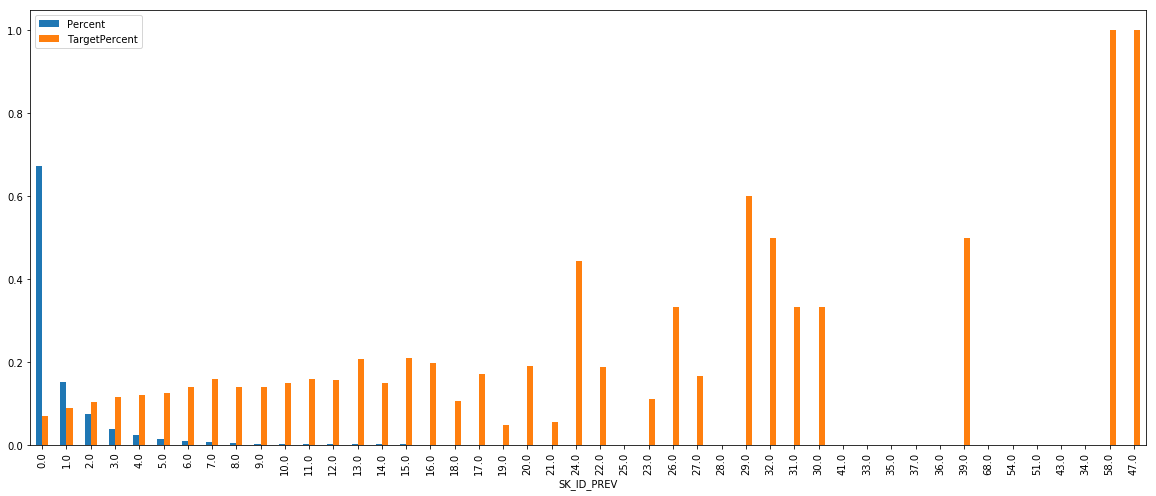

In [8]:
utils.plot.percentage_plot3(train_refused, x='SK_ID_PREV')

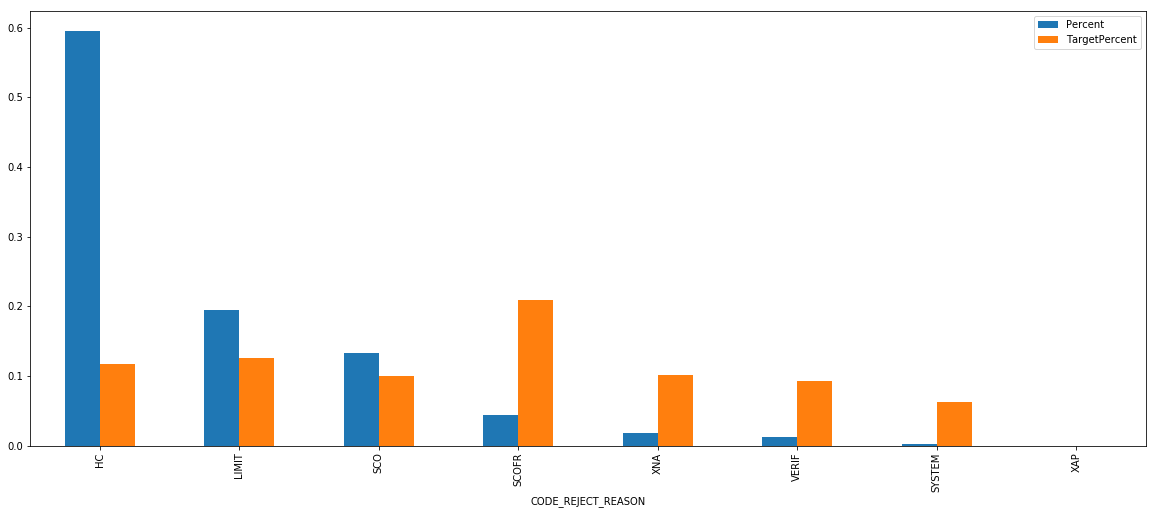

In [9]:
refused2 = train[['SK_ID_CURR', 'TARGET']].merge(prev[prev.NAME_CONTRACT_STATUS == 'Refused'], on='SK_ID_CURR')
utils.plot.percentage_plot3(refused2, x='CODE_REJECT_REASON')

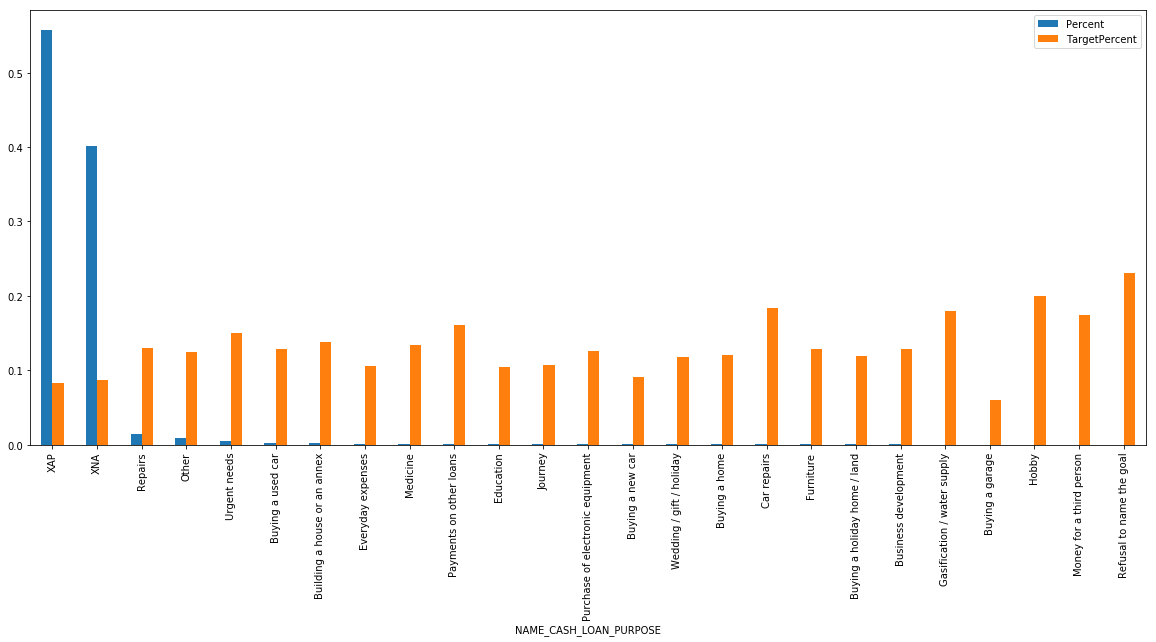

In [10]:
train_prev = train[['SK_ID_CURR', 'TARGET']].merge(prev, on='SK_ID_CURR')
utils.plot.percentage_plot3(train_prev, x='NAME_CASH_LOAN_PURPOSE')

In [11]:
train_prev.RATE_DOWN_PAYMENT.head()

0    0.000000
1         NaN
2    0.000000
3    0.100061
4    0.212008
Name: RATE_DOWN_PAYMENT, dtype: float64

In [12]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
prev[prev['NFLAG_LAST_APPL_IN_DAY'] == 1].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


/home/arizuka/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


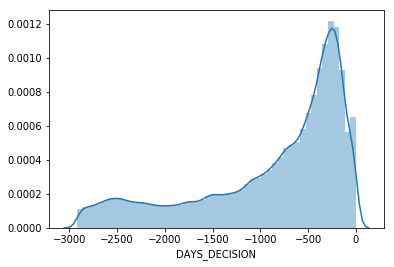

In [14]:
sns.distplot(prev.DAYS_DECISION)

In [23]:
last = pickle.load(open('./features/last_application.pkl', 'rb'))
last.columns = ['last_{}'.format(c) for c in last.columns]
last.head()

,last_AMT_ANNUITY,last_AMT_APPLICATION,last_AMT_CREDIT,last_AMT_DOWN_PAYMENT,last_AMT_GOODS_PRICE,last_CHANNEL_TYPE,last_CNT_PAYMENT,last_CODE_REJECT_REASON,last_DAYS_DECISION,last_DAYS_FIRST_DRAWING,...,last_NAME_YIELD_GROUP,last_NFLAG_INSURED_ON_APPROVAL,last_NFLAG_LAST_APPL_IN_DAY,last_PRODUCT_COMBINATION,last_RATE_DOWN_PAYMENT,last_RATE_INTEREST_PRIMARY,last_RATE_INTEREST_PRIVILEGED,last_SELLERPLACE_AREA,last_SK_ID_PREV,last_WEEKDAY_APPR_PROCESS_START
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000000,24835.5,23787.0,2520.0,24835.5,Country-wide,8.0,XAP,-1740,365243.0,...,high,0.0,1,POS mobile with interest,0.104309,NaN,NaN,23,1369693,FRIDAY
100002,9251.775391,179055.0,179055.0,0.0,179055.0,Stone,24.0,XAP,-606,365243.0,...,low_normal,0.0,1,POS other with interest,0.000000,NaN,NaN,500,1038818,SATURDAY
100003,6737.310059,68809.5,68053.5,6885.0,68809.5,Country-wide,12.0,XAP,-2341,365243.0,...,middle,1.0,1,POS household with interest,0.100037,NaN,NaN,200,2396755,SATURDAY
100004,5357.250000,24282.0,20106.0,4860.0,24282.0,Regional / Local,4.0,XAP,-815,365243.0,...,middle,0.0,1,POS mobile without interest,0.212036,NaN,NaN,30,1564014,FRIDAY
100005,4813.200195,44617.5,40153.5,4464.0,44617.5,Country-wide,12.0,XAP,-757,365243.0,...,high,0.0,1,POS mobile with interest,0.108948,NaN,NaN,37,2495675,THURSDAY
